In [1]:
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize

import pydicom
from pydicom.data import get_testdata_files

import os
from tensorboardX import SummaryWriter

from datasets import Brains
from modules import Conv2D1, ConvTranspose2D1
from models import UNet3D

import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision.transforms as transforms
from torch.utils.data import Dataset

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
data = Brains(crop_size=(64,64))
datait = torch.utils.data.DataLoader(data, batch_size=1, shuffle=True, drop_last=False)

In [ ]:
baseline_unet = UNet3D(input_nc=1, output_nc=2).cuda()

In [10]:
criterion = nn.CrossEntropyLoss()
opt = torch.optim.Adam(baseline_unet.parameters(), lr=1e-3)
epoch = 0
train_loss = []

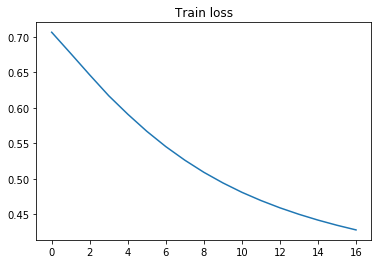

Loss: 0.4279174506664276


KeyboardInterrupt: 

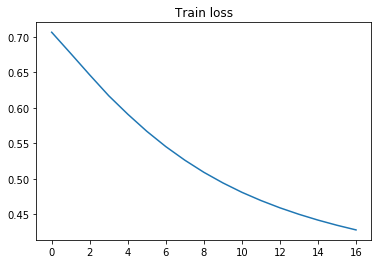

In [11]:
while True:
    print("Epoch", epoch)
    baseline_unet.train(True)
    
    epoch_loss = []
    
    for X_batch, masks_batch in datait:
#         X_batch = X_batch[0]
        preds = baseline_unet(Variable(X_batch).cuda())
        print(preds.shape, masks_batch.shape)
        loss = criterion(preds, masks_batch.squeeze(1).cuda())

        # train on batch
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        epoch_loss.append(loss.cpu().data.numpy())

        train_loss.append(np.mean(epoch_loss))
            
        plt.clf()
        plt.plot(train_loss[-100:])
        plt.title('Train loss')
        
        display.clear_output(wait=True)
        display.display(plt.gcf())
        print("Loss: {}".format(train_loss[-1]))
        epoch += 1

In [ ]:
torch.save(baseline_unet.state_dict(), "model.t")

In [ ]:





# this is a filler









